In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

#### Patient BN_011 used to generate augmented data with standard techniques

In [20]:
x = pd.read_pickle(r'C:\Users\seyidova\Desktop\thesis_imgs\BN_011_00000159_acc_x')
y = pd.read_pickle(r'C:\Users\seyidova\Desktop\thesis_imgs\BN_011_00000159_acc_y')
z = pd.read_pickle(r'C:\Users\seyidova\Desktop\thesis_imgs\BN_011_00000159_acc_z')
h_r=pd.read_pickle(r'C:\Users\seyidova\Desktop\thesis_imgs\BN_011_00000159_heart_rate')
temp= pd.read_pickle(r'C:\Users\seyidova\Desktop\thesis_imgs\BN_011_00000159_temperature')
h_r=h_r[~h_r.index.duplicated()]
temp=temp[~temp.index.duplicated()]
# print(h_r)

start = '2017-03-11 04:21:44'
end =  '2017-03-11 04:23:33'


# Convert the start and end times to datetime objects
start_time = datetime.strptime(start, '%Y-%m-%d %H:%M:%S')
end_time = datetime.strptime(end, '%Y-%m-%d %H:%M:%S')



# Add 10 seconds to the start and end times
start_time -= timedelta(seconds=60)
end_time += timedelta(seconds=60)


# Convert the updated start and end times back to strings
updated_start = start_time.strftime('%Y-%m-%d %H:%M:%S')
updated_end = end_time.strftime('%Y-%m-%d %H:%M:%S')



# Make df with 3 and 5 feat
seizure_acc = pd.concat([x,y,z],axis=1)
seizure_3f = seizure_acc[updated_start:updated_end]
seizure_all = pd.concat([x,y,z,h_r,temp],axis=1)
seizure_5f = seizure_all[updated_start:updated_end]

In [21]:
# x = pd.read_pickle(r'C:\Users\seyidova\Desktop\thesis_imgs\BN_006_00000077_acc_x')
# y = pd.read_pickle(r'C:\Users\seyidova\Desktop\thesis_imgs\BN_006_00000077_acc_y')
# z = pd.read_pickle(r'C:\Users\seyidova\Desktop\thesis_imgs\BN_006_00000077_acc_z')

# start = '2017-03-04 14:49:57'
# end =  '2017-03-04 14:54:32'
# seizure_orig = pd.concat([x,y,z],axis=1)
# seizure = seizure_orig[start:end]

In [22]:
seizure_5f

,acc_x,acc_y,acc_z,heart_rate,temperature
2017-03-11 04:20:44.007,-0.375,0.266,0.820,NaN,NaN
2017-03-11 04:20:44.027,-0.367,0.273,0.836,NaN,NaN
2017-03-11 04:20:44.047,-0.375,0.258,0.828,NaN,NaN
2017-03-11 04:20:44.067,-0.375,0.266,0.820,NaN,NaN
2017-03-11 04:20:44.087,-0.367,0.273,0.812,NaN,NaN
...,...,...,...,...,...
2017-03-11 04:24:33.911,0.219,0.867,0.227,NaN,NaN
2017-03-11 04:24:33.931,0.242,0.883,0.234,NaN,NaN
2017-03-11 04:24:33.951,0.258,0.875,0.203,NaN,NaN
2017-03-11 04:24:33.971,0.242,0.891,0.211,NaN,NaN


In [23]:
start_time = pd.to_datetime(start, infer_datetime_format=True)

end_time = pd.to_datetime(end, infer_datetime_format=True)

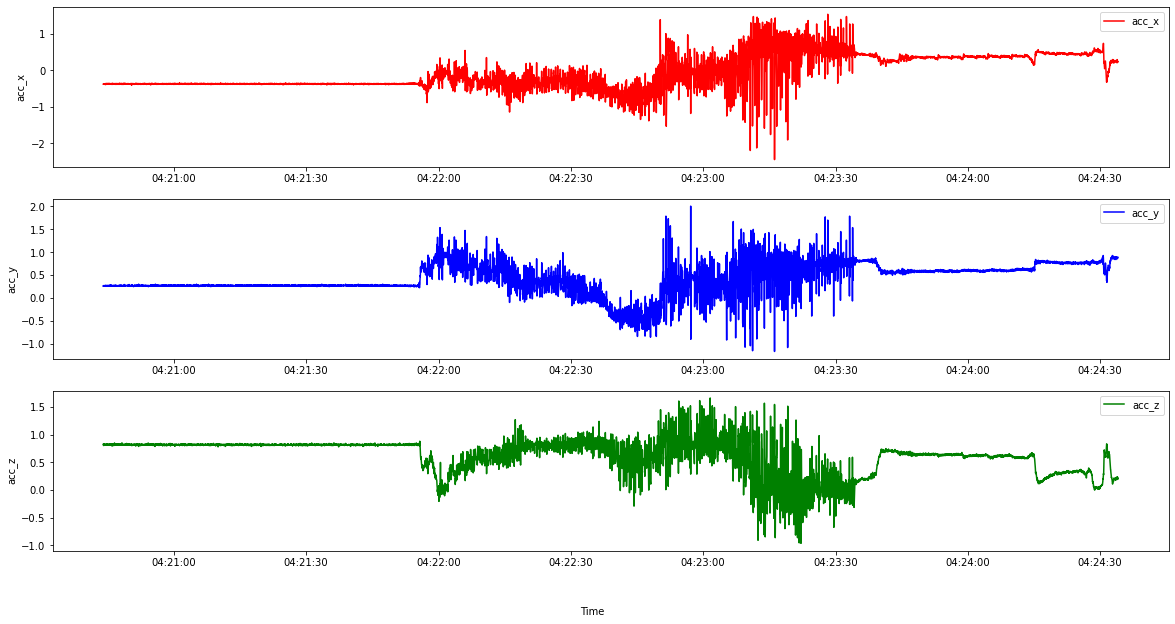

In [24]:

n_cols = seizure_3f.shape[1]

# create subplots
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 10))

# plot each column in its own subplot
colors = ['red', 'blue', 'green', 'purple']


for i, col in enumerate(seizure_3f.columns[:]):
    ax[i].plot(seizure_3f.index, seizure_3f[col], label=col,color=colors[i])
    ax[i].set_ylabel(col)
    ax[i].legend()

# set x-axis label for all subplots
fig.text(0.5, 0.04, 'Time', ha='center', va='center')

# show plot
plt.show()

In [25]:
# take back to the initial start-end time to have only seizure parts to augment
seizure_3f = seizure_acc[start:end]
seizure_5f = seizure_all[start:end]

# Jittering
 - jittering of acc_y , heart rate and temperature

In [26]:
Noise = np.random.normal(loc=0, scale=0.03, size=seizure_5f.shape)
jit_seiz  = pd.DataFrame(seizure_5f.values + Noise,index=seizure_5f.index ,columns=seizure_5f.columns)

#### Plotting jittered acc_y

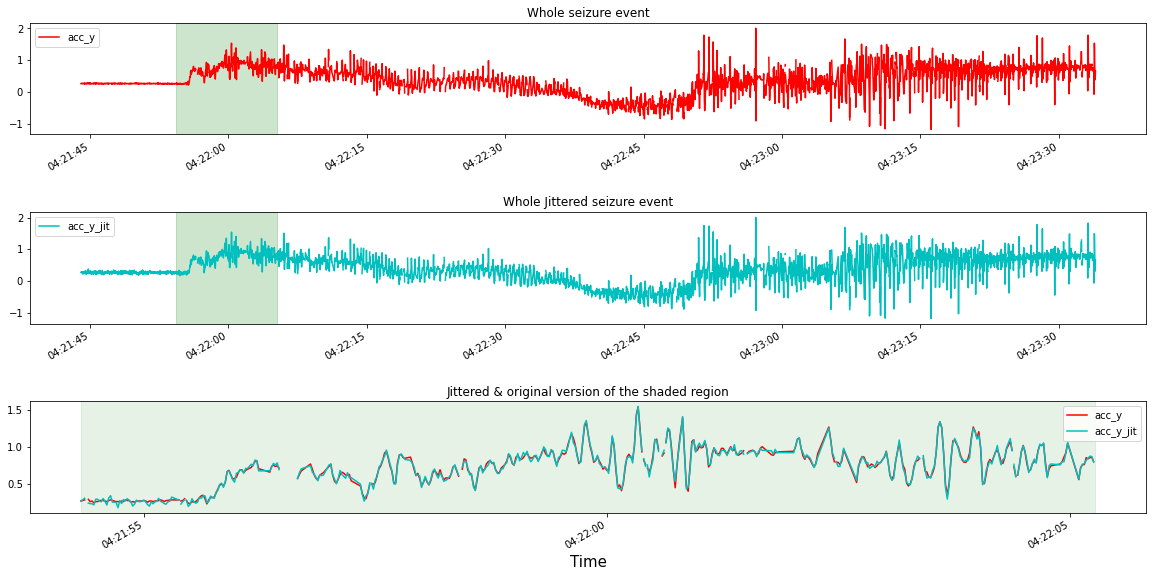

In [27]:
import matplotlib.pyplot as plt



colors = ['red', 'blue', 'green', 'purple']

# create figure and axis with two subplots
fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(20, 10))
fig.subplots_adjust(hspace=0.7)

# plot first dataframe's second column on the first subplot
seizure_5f.plot(y='acc_y', ax=ax1, label='acc_y', color='red')
ax1.set_title('Whole seizure event')
# add legend to the first subplot
ax1.legend()

# plot jittered version of whole seizure event
jit_seiz.plot(y='acc_y', ax=ax2, label='acc_y_jit', color='c')
ax2.set_title('Whole Jittered seizure event')
ax2.legend()

# add a shaded region to the first & second subplot
start = seizure_5f.index[500]
end = seizure_5f.index[1000]
ax1.axvspan(start, end, alpha=0.2, color='green')
ax2.axvspan(start, end, alpha=0.2, color='green')


# plot jittered&original together of the shaded region
seizure_5f.iloc[500:1000].plot(y='acc_y', ax=ax3, label='acc_y', color='red')
# plot second dataframe's second column on the third subplot
jit_seiz[500:1000].plot(y='acc_y', ax=ax3, label='acc_y_jit', color='c')
# set axis labels and title for the second subplot
ax3.set_xlabel('Time',fontsize=15)
# ax2.set_ylabel()
ax3.set_title('Jittered & original version of the shaded region')
# add legend to the second subplot
ax3.legend()
ax3.axvspan(start, end, alpha=0.1, color='green')


# show plot
plt.show()


#### Plotting jittered heart rate and temperature

In [28]:
seizure_5f['heart_rate'].dropna() - jit_seiz['heart_rate'].dropna()

2017-03-11 04:21:44.395    0.042497
2017-03-11 04:21:45.383   -0.003481
2017-03-11 04:21:47.045   -0.026789
2017-03-11 04:21:47.359    0.042519
2017-03-11 04:21:48.391   -0.004600
                             ...   
2017-03-11 04:23:29.763   -0.016751
2017-03-11 04:23:30.423   -0.011096
2017-03-11 04:23:31.421    0.095021
2017-03-11 04:23:32.500   -0.010172
2017-03-11 04:23:33.631    0.024164
Name: heart_rate, Length: 96, dtype: float64

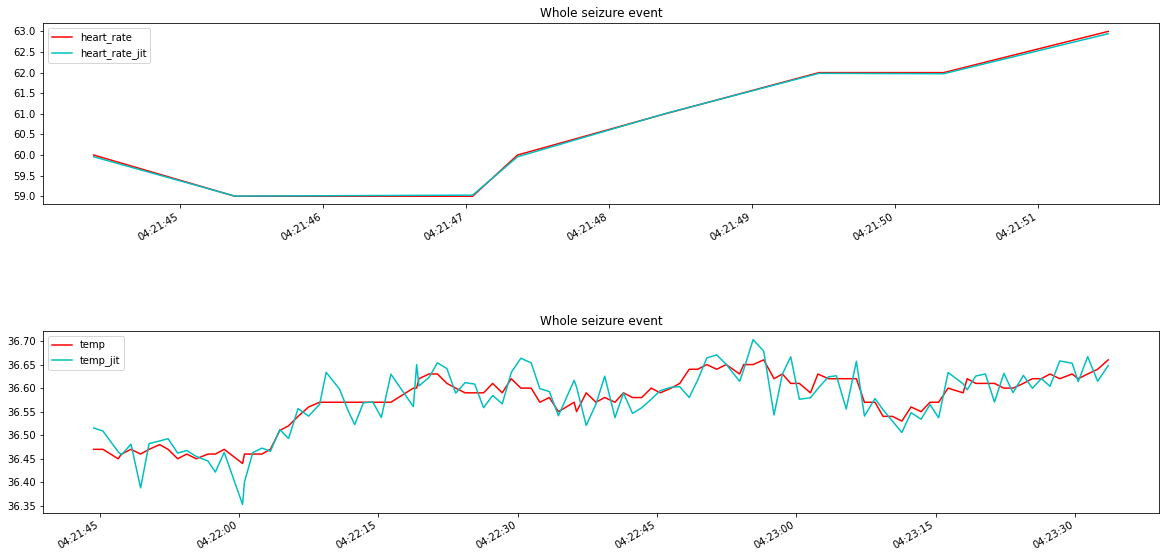

In [29]:
import matplotlib.pyplot as plt



colors = ['red', 'blue', 'green', 'purple']

# create figure and axis with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))
fig.subplots_adjust(hspace=0.7)

# plot heart rate and its jittered version in single plot
seizure_5f['heart_rate'].dropna()[:8].plot(y='heart_rate', ax=ax1, label='heart_rate', color='red')
jit_seiz['heart_rate'].dropna()[:8].plot(y='heart_rate', ax=ax1, label='heart_rate_jit', color='c')
ax1.set_title('Whole seizure event')
# add legend to the first subplot
ax1.legend()


# plot temperature and its jittered version in single plot
seizure_5f['temperature'].dropna().plot(y='temperature', ax=ax2, label='temp', color='red')
jit_seiz['temperature'].dropna().plot(y='temperature', ax=ax2, label='temp_jit', color='c')
ax2.set_title('Whole seizure event')
# add legend to the first subplot
ax2.legend()


# show plot
plt.show()


# Permutation
- permutation of acc_y , heart rate and temperature

In [30]:
seiz = seizure_5f
nPerm=5
X = seiz.values
X_new = np.zeros(X.shape)  # zeros of total length of given input shape-> number of time steps
idx = np.random.permutation(nPerm)
idx

array([3, 2, 0, 4, 1])

In [31]:
bWhile=True
minSegLength=10
while bWhile == True:
    segs = np.zeros(nPerm+1, dtype=int)
    # print(segs)
    segs[1:-1] = np.sort(np.random.randint(minSegLength, X.shape[0]-minSegLength, nPerm-1))
    # print(segs)
    segs[-1] = X.shape[0]
    print(segs)
    if np.min(segs[1:]-segs[0:-1]) > minSegLength:
        bWhile = False

[   0  465 1230 1361 2532 4962]


In [32]:
pp=0
l = []
# l.append(0)
for ii in range(nPerm):
    x_temp = X[segs[idx[ii]]:segs[idx[ii]+1],:]
    # print(x_temp.shape)
    X_new[pp:pp+len(x_temp),:] = x_temp
    l.append(pp+len(x_temp))
    pp += len(x_temp)

new_df_orig = pd.DataFrame(X_new , index= seiz.index , columns=seiz.columns)


In [33]:
seiz = seiz['acc_y']
new_df = new_df_orig['acc_y']

In [34]:
str(seiz.index[0])

'2017-03-11 04:21:44.011000'

#### Plotting permutated acc_y

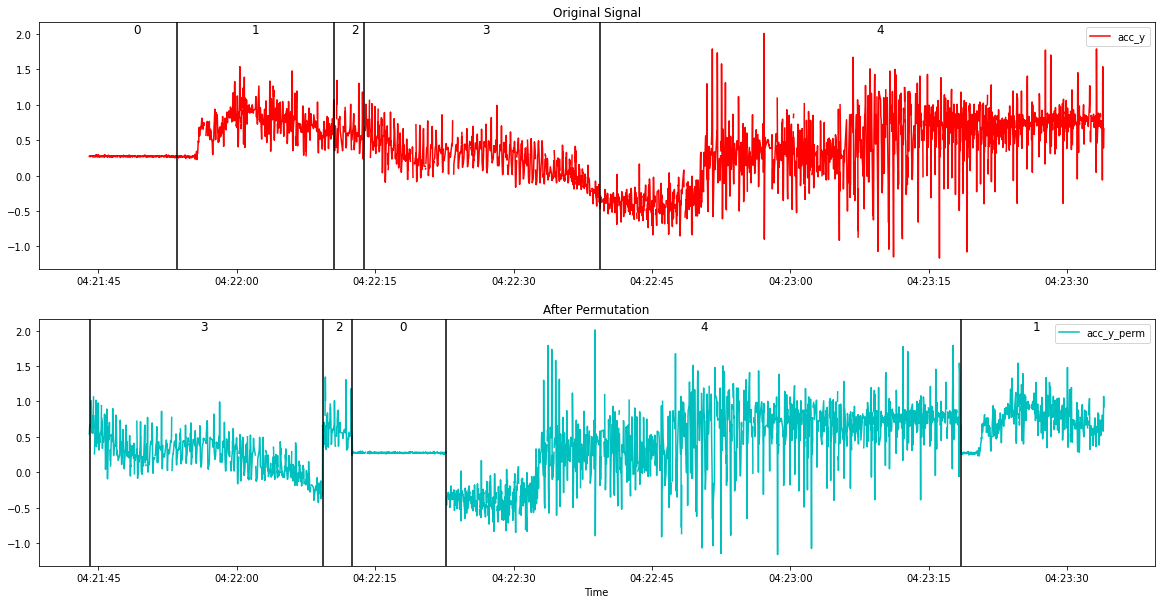

In [35]:
f, (x, x_p) = plt.subplots(2, 1)
f.set_figheight(10)
f.set_figwidth(20)

x.plot(seiz.index,seiz.values,'r', label='acc_y')
x.set_title('Original Signal')
segments = segs[1:]
for i in range(len(segments)):
    if i==0:
        x.axvline(x=seiz.index[segments[i]], color='k')
        x.text(seiz.index[int((segments[i])/2)], seiz.max(), f'{i}',fontsize=12)
    elif i==(len(segments)-1):
        x.text(seiz.index[int((segments[i-1]+segments[i])/2)], seiz.max(),f'{i}',fontsize=12)
    else:
        x.text(seiz.index[int((segments[i-1]+segments[i])/2)], seiz.max(),f'{i}',fontsize=12)
        x.axvline(x=seiz.index[segments[i]-1], color='k')
x.legend()

x_p.plot(new_df.index,new_df.values,'c', label='acc_y_perm')
x_p.set_xlabel('Time')
x_p.set_title("After Permutation")
segments = l
c=0
for s in range(len(segments)):
    if s==0:
        x_p.axvline(x=new_df.index[segments[s]], color='k')
        x_p.text(new_df.index[int((segments[s])/2)], new_df.max(), f'{idx[c]}',fontsize=12)
    elif s==len(segments)-1:
        x_p.axvline(x=new_df.index[s], color='k')
        x_p.text(new_df.index[int((segments[s-1]+segments[s])/2)], new_df.max(),f'{idx[c]}',fontsize=12)
    else:
        x_p.text(seiz.index[int((segments[s-1]+segments[s])/2)], seiz.max(),f'{idx[c]}',fontsize=12)
        x_p.axvline(x=seiz.index[segments[s]-1], color='k')
    c+=1
x_p.legend()


#### Plotting permutated heart rate and temperature

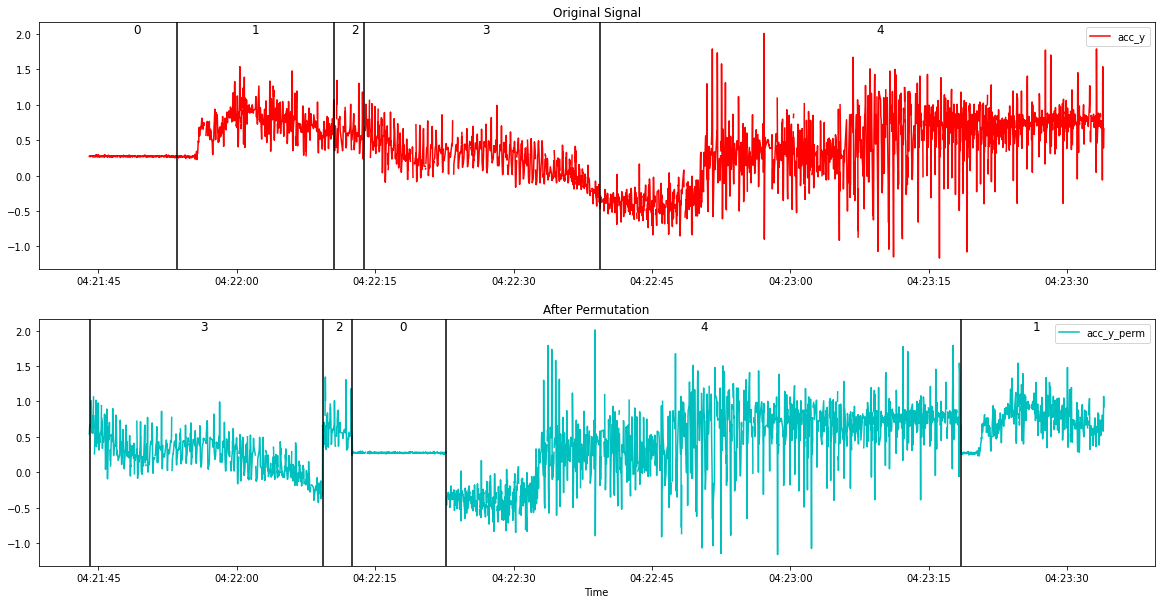

In [36]:

f, (x, x_p) = plt.subplots(2, 1)
f.set_figheight(10)
f.set_figwidth(20)

x.plot(seiz.index,seiz.values,'r', label='acc_y')
x.set_title('Original Signal')
segments = segs[1:]
for i in range(len(segments)):
    if i==0:
        x.axvline(x=seiz.index[segments[i]], color='k')
        x.text(seiz.index[int((segments[i])/2)], seiz.max(), f'{i}',fontsize=12)
    elif i==(len(segments)-1):
        x.text(seiz.index[int((segments[i-1]+segments[i])/2)], seiz.max(),f'{i}',fontsize=12)
    else:
        x.text(seiz.index[int((segments[i-1]+segments[i])/2)], seiz.max(),f'{i}',fontsize=12)
        x.axvline(x=seiz.index[segments[i]-1], color='k')
x.legend()

x_p.plot(new_df.index,new_df.values,'c', label='acc_y_perm')
x_p.set_xlabel('Time')
x_p.set_title("After Permutation")
segments = l
c=0
for s in range(len(segments)):
    if s==0:
        x_p.axvline(x=new_df.index[segments[s]], color='k')
        x_p.text(new_df.index[int((segments[s])/2)], new_df.max(), f'{idx[c]}',fontsize=12)
    elif s==len(segments)-1:
        x_p.axvline(x=new_df.index[s], color='k')
        x_p.text(new_df.index[int((segments[s-1]+segments[s])/2)], new_df.max(),f'{idx[c]}',fontsize=12)
    else:
        x_p.text(seiz.index[int((segments[s-1]+segments[s])/2)], seiz.max(),f'{idx[c]}',fontsize=12)
        x_p.axvline(x=seiz.index[segments[s]-1], color='k')
    c+=1
x_p.legend()


# Magnitude Warping
- Mag warping of acc data only / acc_y 

In [37]:
timeseries = seizure_3f

In [38]:
def DA_MagWarp(df, sigma):
    df_empty=df
    X= df_empty.values
    c = GenerateRandomCurves(X, sigma)
    output_df = pd.DataFrame(X*c,index=df_empty.index,columns=df_empty.columns)

    return output_df,c

from scipy.interpolate import CubicSpline
def GenerateRandomCurves(X, sigma=0.2, knot=4):
    xx = (np.ones((X.shape[1],1))*(np.arange(0,X.shape[0], (X.shape[0]-1)/(knot+1)))).transpose()
    yy = np.random.normal(loc=1.0, scale=sigma, size=(knot+2, X.shape[1]))
    x_range = np.arange(X.shape[0])
    cs_x = CubicSpline(xx[:,0], yy[:,0])
    cs_y = CubicSpline(xx[:,1], yy[:,1])
    cs_z = CubicSpline(xx[:,2], yy[:,2])
    return np.array([cs_x(x_range),cs_y(x_range),cs_z(x_range)]).transpose()

In [39]:
mw,c= DA_MagWarp(timeseries,0.2)

In [40]:
# convert the cubicsplines to df to plot
a = c
a = pd.DataFrame(data=a , index=timeseries.index,columns=timeseries.columns)
a

,acc_x,acc_y,acc_z
2017-03-11 04:21:44.011,0.778033,0.485909,1.054992
2017-03-11 04:21:44.031,0.776761,0.485025,1.054122
2017-03-11 04:21:44.051,0.775493,0.484143,1.053253
2017-03-11 04:21:44.071,0.774228,0.483264,1.052386
2017-03-11 04:21:44.091,0.772965,0.482389,1.051520
...,...,...,...
2017-03-11 04:23:33.907,0.926111,1.005942,0.870686
2017-03-11 04:23:33.927,0.926728,1.005037,0.869806
2017-03-11 04:23:33.947,0.927346,1.004128,0.868923
2017-03-11 04:23:33.967,0.927964,1.003218,0.868039


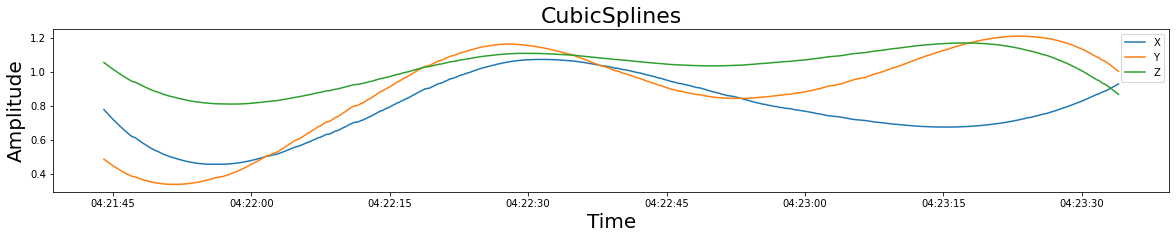

In [41]:
plt.figure(figsize=(20,10//3))
plt.plot(a.index,a.values)
plt.title('CubicSplines',fontsize=22)
plt.xlabel("Time",fontsize=20)
plt.ylabel("Amplitude",fontsize=20)
plt.legend(['X' , 'Y' , 'Z'])

In [42]:
# # convert the mw signal to df to plot
mwdf = pd.DataFrame(data=mw,index=timeseries.index,columns=timeseries.columns)

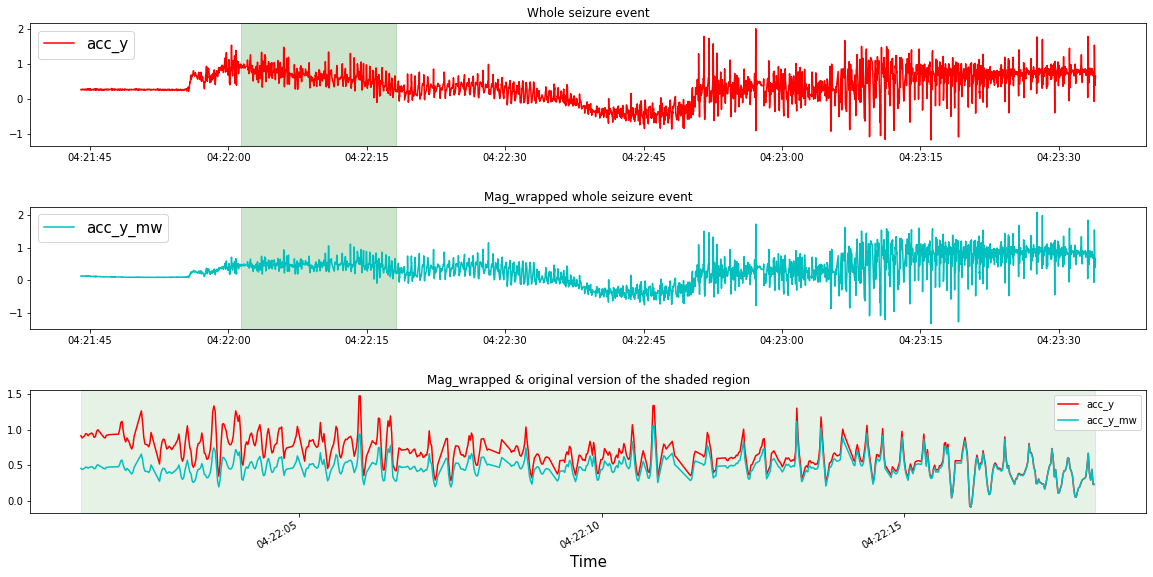

In [43]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1)
f.set_figheight(10)
f.set_figwidth(20)
f.subplots_adjust(hspace=0.5)



# y.figure(figsize=(20,10))
ax1.plot(timeseries['acc_y'].index[:],timeseries['acc_y'].values[:],'r')
# plt.figure(figsize=(20,10))
ax1.set_title('Whole seizure event')
# add legend to the first subplot
ax1.legend(['acc_y'],fontsize=15)


# plt.figure(figsize=(20,10))
ax2.plot(mwdf['acc_y'].index[:],mwdf['acc_y'].values[:],'c')
ax2.set_title('Mag_wrapped whole seizure event')
# add legend to the first subplot
ax2.legend(['acc_y_mw'],fontsize=15)


# add a shaded region to the first & second subplot
start = timeseries.index[800]
end = timeseries.index[1500]
ax1.axvspan(start, end, alpha=0.2, color='green')
ax2.axvspan(start, end, alpha=0.2, color='green')


# plot jittered&original together of the shaded region
timeseries[800:1500].plot(y='acc_y', ax=ax3, label='acc_y', color='r')
# plot second dataframe's second column on the third subplot
mwdf[800:1500].plot(y='acc_y', ax=ax3, label='acc_y_mw', color='c')
# set axis labels and title for the second subplot
ax3.set_xlabel('Time',fontsize=15)
# ax2.set_ylabel()
ax3.set_title('Mag_wrapped & original version of the shaded region')



# set x-axis label for third subplot
ax3.set_xlabel('Time', fontsize=15)
ax3.axvspan(start, end, alpha=0.1, color='green')

# display the plot
plt.show()




# Time Wraping

In [44]:
def DA_TimeWarp(data_dict, sigma=0.2):
    df_empty=data_dict
    X= df_empty.values
    tt_new = DistortTimesteps(X, sigma)
    X_new = np.zeros(X.shape)
    x_range = np.arange(X.shape[0])
    X_new[:,0] = np.interp(x_range, tt_new[:,0], X[:,0])
    X_new[:,1] = np.interp(x_range, tt_new[:,1], X[:,1])
    X_new[:,2] = np.interp(x_range, tt_new[:,2], X[:,2])

    output_df = pd.DataFrame(X_new,index=df_empty.index,columns=df_empty.columns)

    return output_df,tt_new

def DistortTimesteps(X, sigma=0.2):
    tt = GenerateRandomCurves(X, sigma) # Regard these samples aroun 1 as time intervals
    tt_cum = np.cumsum(tt, axis=0)        # Add intervals to make a cumulative graph
    # Make the last value to have X.shape[0]
    t_scale = [(X.shape[0]-1)/tt_cum[-1,0],(X.shape[0]-1)/tt_cum[-1,1],(X.shape[0]-1)/tt_cum[-1,2]]
    tt_cum[:,0] = tt_cum[:,0]*t_scale[0]
    tt_cum[:,1] = tt_cum[:,1]*t_scale[1]
    tt_cum[:,2] = tt_cum[:,2]*t_scale[2]
    return tt_cum

In [45]:
tw,tt_new =DA_TimeWarp(timeseries)
tw = pd.DataFrame(tw,timeseries.index,columns=timeseries.columns)

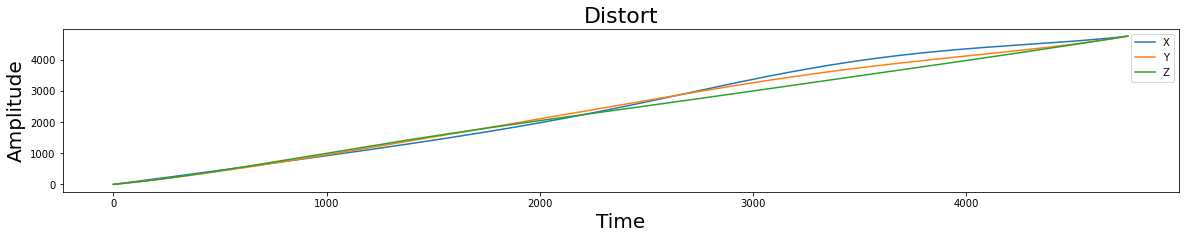

In [46]:
a = tt_new
plt.figure(figsize=(20,10//3))
plt.plot(a)
plt.title('Distort',fontsize=22)
plt.xlabel("Time",fontsize=20)
plt.ylabel("Amplitude",fontsize=20)
plt.legend(['X' , 'Y' , 'Z'])

Text(0, 0.5, 'Acc_z')

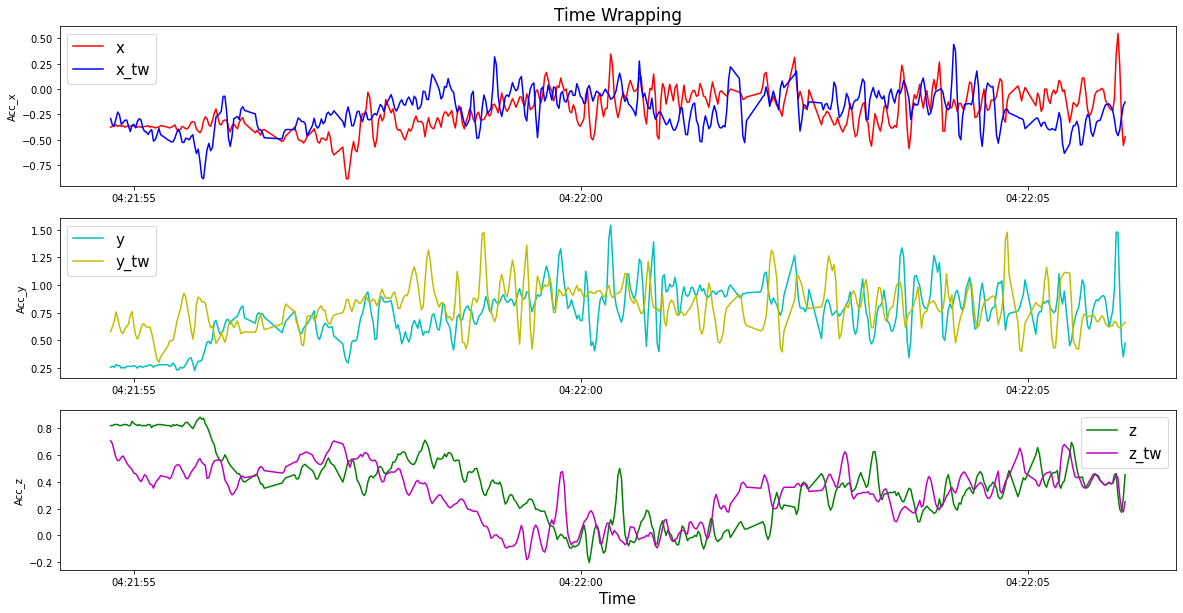

In [47]:
f, (x, y,z) = plt.subplots(3, 1)
f.set_figheight(10)
f.set_figwidth(20)
x.plot(tw.index[500:1000],timeseries.values[500:1000,:1],'r')
# plt.figure(figsize=(20,10))
x.plot(tw.index[500:1000],tw.values[500:1000,:1],'b')
x.legend(['x','x_tw'],fontsize=15)
x.set_ylabel('Acc_x')
x.set_title("Time Wrapping",fontsize=17)
# y.figure(figsize=(20,10))
y.plot(tw.index[500:1000],timeseries.values[500:1000,1],'c')
# plt.figure(figsize=(20,10))
y.plot(tw.index[500:1000],tw.values[500:1000,1],'y')
y.legend(['y','y_tw'],fontsize=15)
y.set_ylabel('Acc_y')

# z.figure(figsize=(20,10))
z.plot(tw.index[500:1000],timeseries.values[500:1000,2],'g')
# plt.figure(figsize=(20,10))
z.plot(tw.index[500:1000],tw
       .values[500:1000,2],'m')
z.legend(['z','z_tw'],fontsize=15)
z.set_xlabel("Time",fontsize=15)
z.set_ylabel('Acc_z')


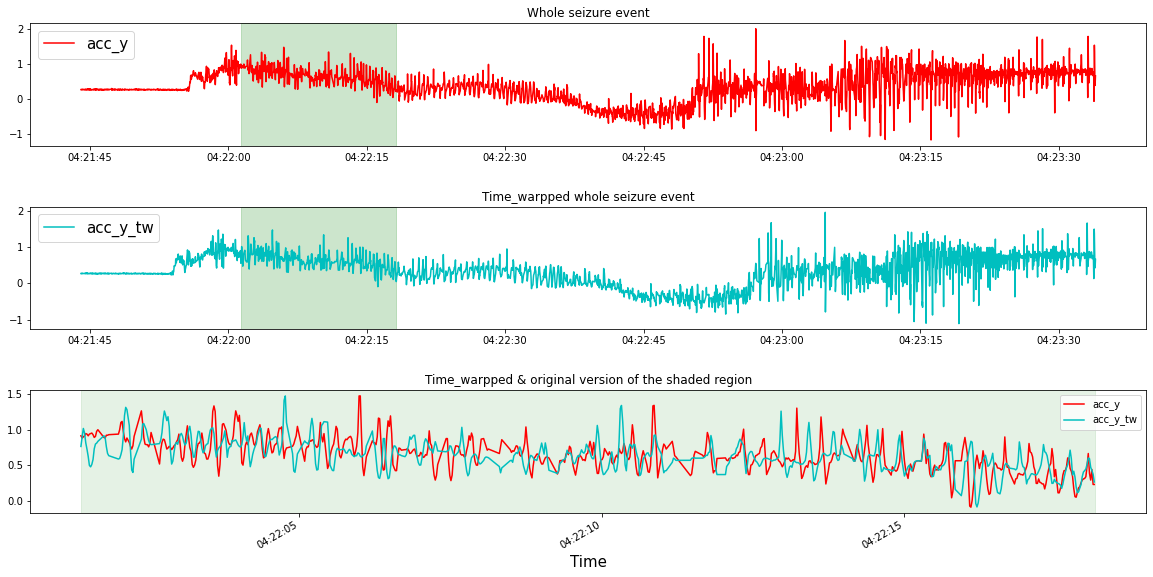

In [48]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1)
f.set_figheight(10)
f.set_figwidth(20)
f.subplots_adjust(hspace=0.5)

# y.figure(figsize=(20,10))
ax1.plot(timeseries['acc_y'].index[:],timeseries['acc_y'].values[:],'r')
# plt.figure(figsize=(20,10))
ax1.set_title('Whole seizure event')
# add legend to the first subplot
ax1.legend(['acc_y'],fontsize=15)


# plt.figure(figsize=(20,10))
ax2.plot(tw['acc_y'].index[:],tw['acc_y'].values[:],'c')
ax2.set_title('Time_warpped whole seizure event')
# add legend to the first subplot
ax2.legend(['acc_y_tw'],fontsize=15)


# add a shaded region to the first & second subplot
start = timeseries.index[800]
end = timeseries.index[1500]
ax1.axvspan(start, end, alpha=0.2, color='green')
ax2.axvspan(start, end, alpha=0.2, color='green')


# plot jittered&original together of the shaded region
timeseries[800:1500].plot(y='acc_y', ax=ax3, label='acc_y', color='r')
# plot second dataframe's second column on the third subplot
tw[800:1500].plot(y='acc_y', ax=ax3, label='acc_y_tw', color='c')
# set axis labels and title for the second subplot
ax3.set_xlabel('Time',fontsize=15)
# ax2.set_ylabel()
ax3.set_title('Time_warpped & original version of the shaded region')



# set x-axis label for third subplot
ax3.set_xlabel('Time', fontsize=15)
ax3.axvspan(start, end, alpha=0.1, color='green')

# display the plot
plt.show()




# Rotation

In [49]:
!pip install transforms3d

In [50]:
from transforms3d.axangles import axangle2mat
axis = np.random.uniform(low=-1, high=1, size=timeseries.shape[1])
angle = np.random.uniform(low=-np.pi, high=np.pi)
k = axangle2mat(axis,angle)

In [51]:
new_series = np.matmul(timeseries.values,k)
ndf = pd.DataFrame(new_series,index=timeseries.index,columns=timeseries.columns)

In [52]:
l =[]
for i in range(len(timeseries)):
    l.append(np.matmul(k,timeseries.iloc[i].values).T)

In [53]:
n  = pd.DataFrame(data = np.stack(l,axis=0), index=timeseries.index,columns=timeseries.columns)

Text(0, 0.5, 'acc_z')

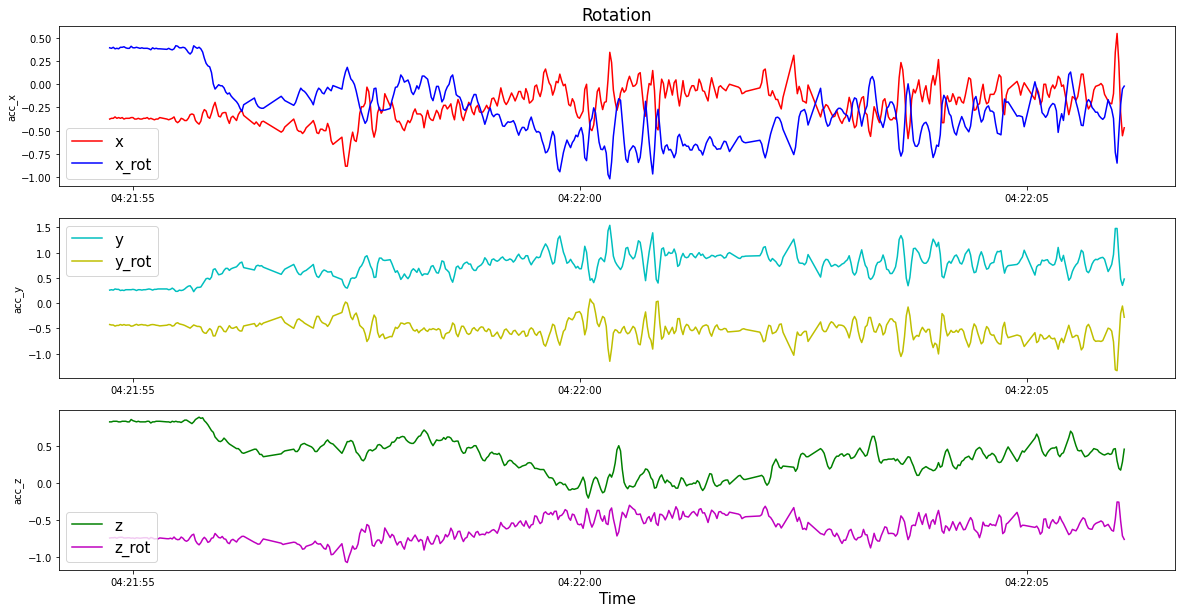

In [54]:
f, (x, y,z) = plt.subplots(3, 1)
f.set_figheight(10)
f.set_figwidth(20)
x.plot(ndf.index[500:1000],timeseries.values[500:1000,:1],'r')
# plt.figure(figsize=(20,10))
x.plot(ndf.index[500:1000],ndf.values[500:1000,:1],'b')
x.legend(['x','x_rot'],fontsize=15)
x.set_ylabel('acc_x')
x.set_title("Rotation",fontsize=17)
# y.figure(figsize=(20,10))
y.plot(ndf.index[500:1000],timeseries.values[500:1000,1],'c')
# plt.figure(figsize=(20,10))
y.plot(ndf.index[500:1000],ndf.values[500:1000,1],'y')
y.legend(['y','y_rot'],fontsize=15)
y.set_ylabel('acc_y')

# z.figure(figsize=(20,10))
z.plot(ndf.index[500:1000],timeseries.values[500:1000,2],'g')
# plt.figure(figsize=(20,10))
z.plot(ndf.index[500:1000],ndf.values[500:1000,2],'m')
z.legend(['z','z_rot'],fontsize=15,loc='lower left')
z.set_xlabel("Time",fontsize=15)
z.set_ylabel('acc_z')


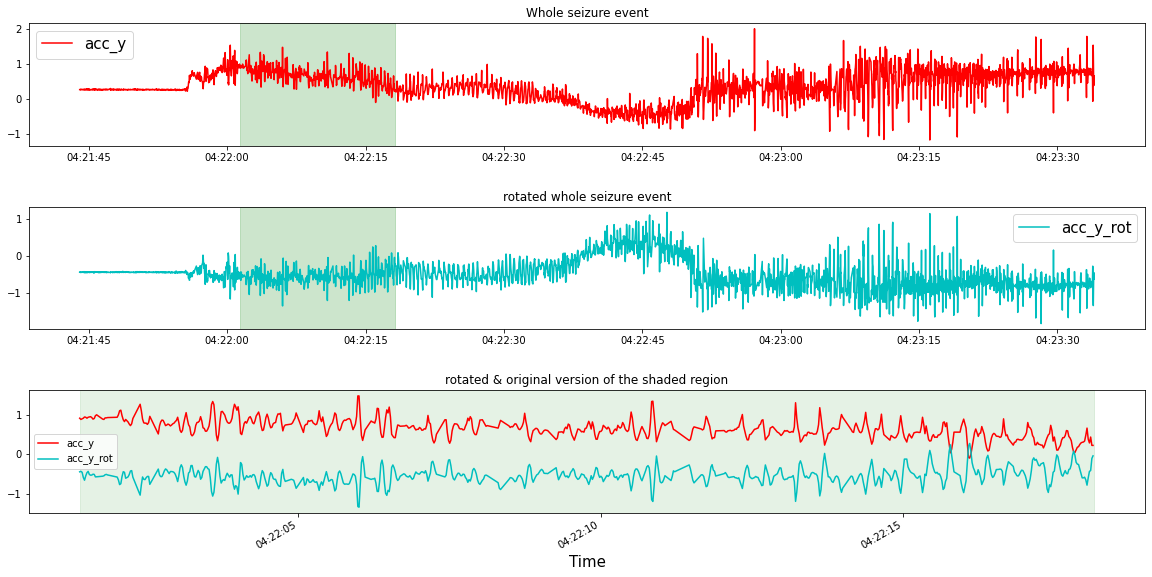

In [55]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1)
f.set_figheight(10)
f.set_figwidth(20)
f.subplots_adjust(hspace=0.5)

# y.figure(figsize=(20,10))
ax1.plot(timeseries['acc_y'].index[:],timeseries['acc_y'].values[:],'r')
# plt.figure(figsize=(20,10))
ax1.set_title('Whole seizure event')
# add legend to the first subplot
ax1.legend(['acc_y'],fontsize=15)


# plt.figure(figsize=(20,10))
ax2.plot(ndf['acc_y'].index[:],ndf['acc_y'].values[:],'c')
ax2.set_title('rotated whole seizure event')
# add legend to the first subplot
ax2.legend(['acc_y_rot'],fontsize=15)


# add a shaded region to the first & second subplot
start = timeseries.index[800]
end = timeseries.index[1500]
ax1.axvspan(start, end, alpha=0.2, color='green')
ax2.axvspan(start, end, alpha=0.2, color='green')


# plot jittered&original together of the shaded region
timeseries[800:1500].plot(y='acc_y', ax=ax3, label='acc_y', color='r')
# plot second dataframe's second column on the third subplot
ndf[800:1500].plot(y='acc_y', ax=ax3, label='acc_y_rot', color='c')
# set axis labels and title for the second subplot
ax3.set_xlabel('Time',fontsize=15)
# ax2.set_ylabel()
ax3.set_title('rotated & original version of the shaded region')



# set x-axis label for third subplot
ax3.set_xlabel('Time', fontsize=15)
ax3.axvspan(start, end, alpha=0.1, color='green')

# display the plot
plt.show()




# Rotation + Permutation


In [56]:
from transforms3d.axangles import axangle2mat
def rot(timeseries):
    axis = np.random.uniform(low=-1, high=1, size=timeseries.shape[1])
    angle = np.random.uniform(low=-np.pi, high=np.pi)
    k = axangle2mat(axis,angle)
    new_series = np.matmul(timeseries.values,k)
    ndf = pd.DataFrame(new_series,index=timeseries.index,columns=timeseries.columns)
    # l =[]
    # for i in range(len(timeseries)):
    #     l.append(np.matmul(k,timeseries.iloc[i].values).T)
    # n = pd.DataFrame(data = np.stack(l,axis=0), index=timeseries.index,columns=timeseries.columns)
    return ndf

In [57]:
def permu(timeseries):
    seiz = timeseries
    nPerm=5
    X = seiz.values
    X_new = np.zeros(X.shape)  # zeros of total length of given input shape-> number of time steps
    idx = np.random.permutation(nPerm)
    idx
    bWhile=True
    minSegLength=10
    while bWhile == True:
        segs = np.zeros(nPerm+1, dtype=int)
        # print(segs)
        segs[1:-1] = np.sort(np.random.randint(minSegLength, X.shape[0]-minSegLength, nPerm-1))
        # print(segs)
        segs[-1] = X.shape[0]
        print(segs)
        if np.min(segs[1:]-segs[0:-1]) > minSegLength:
            bWhile = False

        pp=0
    l = []
    # l.append(0)
    for ii in range(nPerm):
        x_temp = X[segs[idx[ii]]:segs[idx[ii]+1],:]
        # print(x_temp.shape)
        X_new[pp:pp+len(x_temp),:] = x_temp
        l.append(pp+len(x_temp))
        pp += len(x_temp)

    new_df = pd.DataFrame(X_new , index= seiz.index , columns=seiz.columns)

    return new_df


In [58]:
permi = permu(timeseries)
rote = rot(permi)


[   0  595  895 3774 4346 4761]


In [59]:
rote = rot(permi)

Text(0.5, 1.0, 'Rotation')

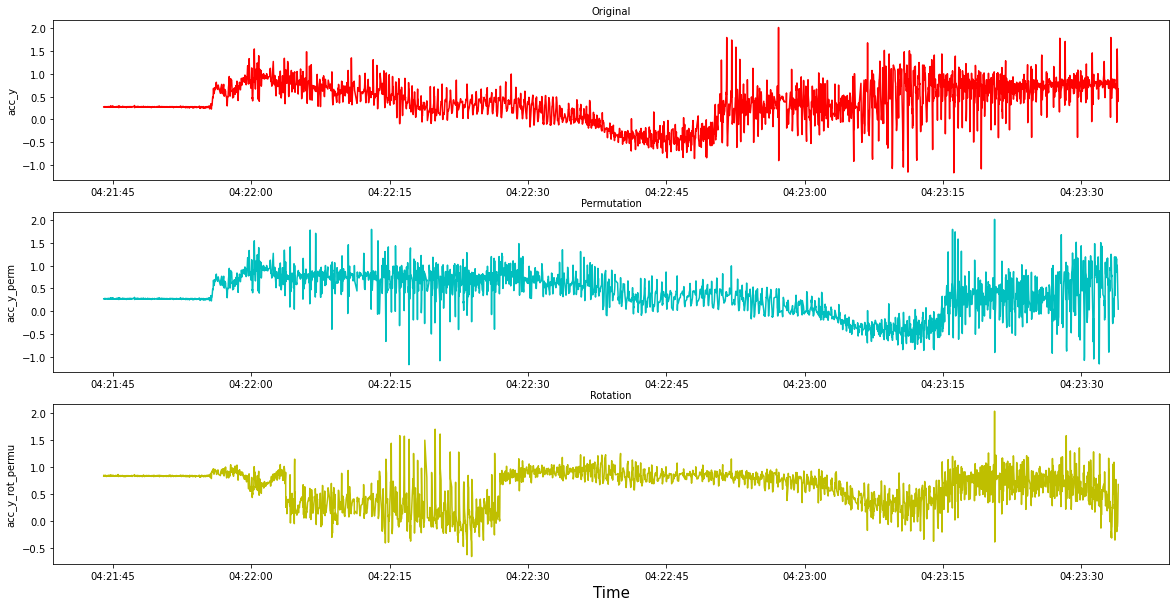

In [60]:
f, (x, y,z) = plt.subplots(3, 1)
f.set_figheight(10)
f.set_figwidth(20)
x.plot(rote.index,timeseries.values[:,1],'r')
x.set_ylabel('acc_y')
x.set_title("Original",fontsize=10)

y.plot(permi.index,permi.values[:,1],'c')
y.set_ylabel('acc_y_perm')
y.set_title("Permutation",fontsize=10)

z.plot(rote.index,rote.values[:,1],'y')
z.set_xlabel("Time",fontsize=15)
z.set_ylabel('acc_y_rot_permu')
z.set_title("Rotation",fontsize=10)

# Rotation  + Permutation + Time Warping

In [61]:
timi,_ = DA_TimeWarp(timeseries)
permi = permu(timi)
rote = rot(permi)



[   0 2148 2182 3611 4557 4761]


Text(0.5, 1.0, 'Rotation')

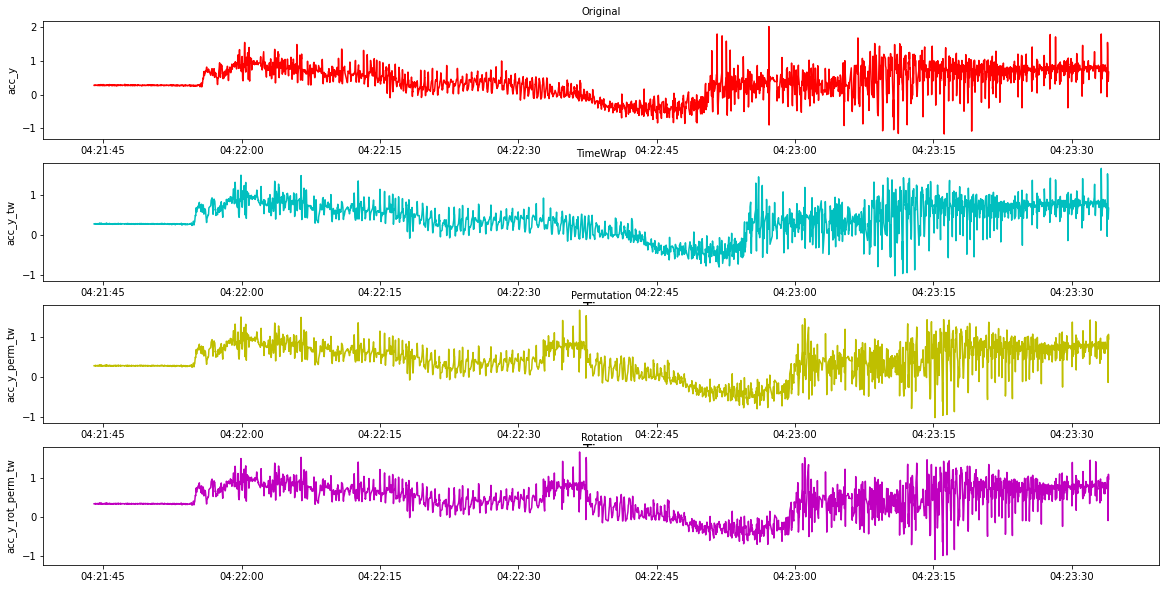

In [62]:
f, (x, y,z,d) = plt.subplots(4, 1)
f.set_figheight(10)
f.set_figwidth(20)
x.plot(rote.index,timeseries.values[:,1],'r')
x.set_ylabel('acc_y')
x.set_title("Original",fontsize=10)

y.plot(timi.index,timi.values[:,1],'c')
y.set_xlabel("Time",fontsize=15)
y.set_ylabel('acc_y_tw')
y.set_title("TimeWrap",fontsize=10)

z.plot(permi.index,permi.values[:,1],'y')
z.set_xlabel("Time",fontsize=15)
z.set_ylabel('acc_y_perm_tw')
z.set_title("Permutation",fontsize=10)


d.plot(rote.index,rote.values[:,1],'m')
d.set_ylabel('acc_y_rot_perm_tw')
d.set_title("Rotation",fontsize=10)


# Permutation And TimeWarping

In [63]:
timi,_ = DA_TimeWarp(timeseries)
permi = permu(timi)


[   0 1308 2623 4173 4221 4761]


Text(0.5, 1.0, 'Permutation')

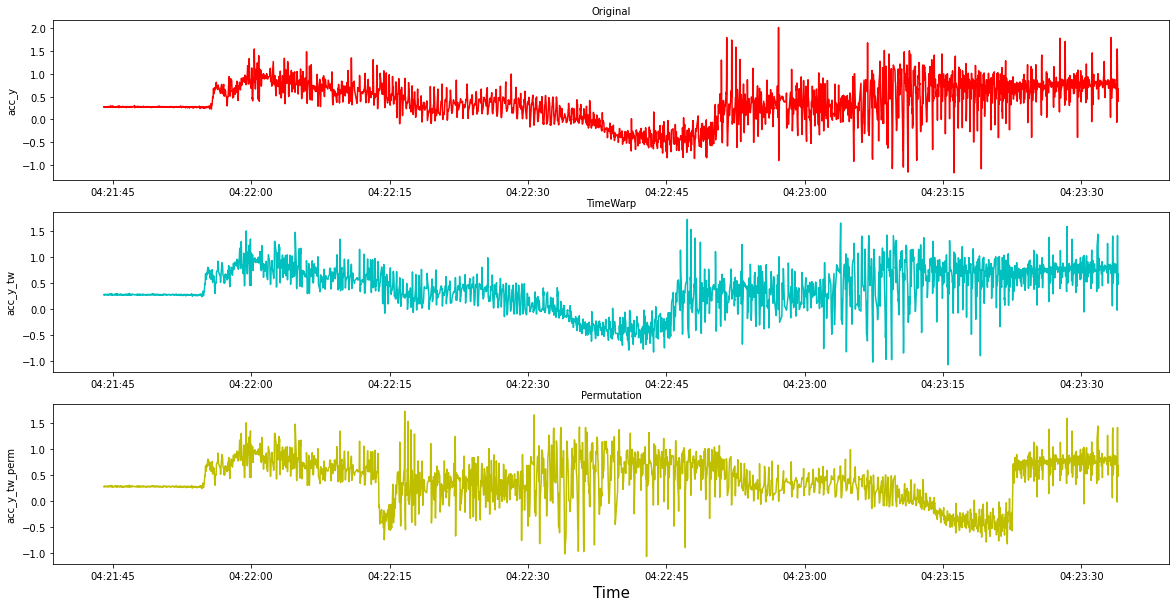

In [64]:
f, (x, y,z) = plt.subplots(3, 1)
f.set_figheight(10)
f.set_figwidth(20)
x.plot(timeseries.index,timeseries.values[:,1],'r')
x.set_ylabel('acc_y')
x.set_title("Original",fontsize=10)

y.plot(timi.index,timi.values[:,1],'c')
y.set_ylabel('acc_y_tw')
y.set_title("TimeWarp",fontsize=10)

z.plot(permi.index,permi.values[:,1],'y')
z.set_xlabel("Time",fontsize=15)
z.set_ylabel('acc_y_tw_perm')
z.set_title("Permutation",fontsize=10)

# Rotation + TimeWarping

In [65]:
timi,_ = DA_TimeWarp(timeseries)
rote = rot(timi)


Text(0.5, 1.0, 'Rotation')

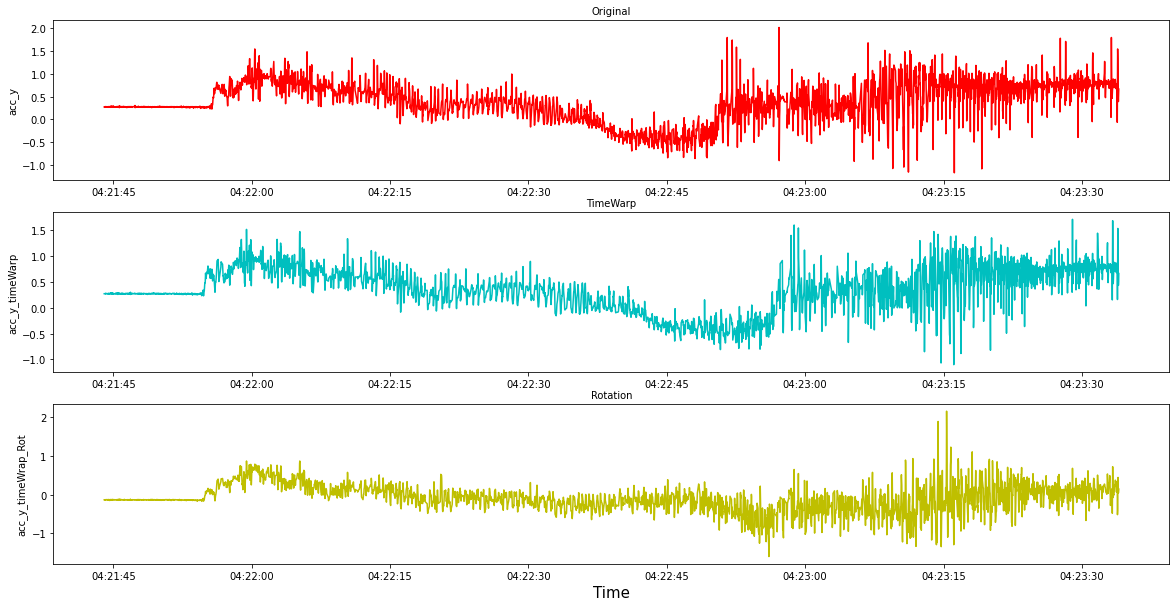

In [66]:
f, (x, y,z) = plt.subplots(3, 1)
f.set_figheight(10)
f.set_figwidth(20)
x.plot(timeseries.index,timeseries.values[:,1],'r')
x.set_ylabel('acc_y')
x.set_title("Original",fontsize=10)

y.plot(timi.index,timi.values[:,1],'c')
y.set_ylabel('acc_y_timeWarp')
y.set_title("TimeWarp",fontsize=10)

z.plot(rote.index,rote.values[:,1],'y')
z.set_xlabel("Time",fontsize=15)
z.set_ylabel('acc_y_timeWrap_Rot')
z.set_title("Rotation",fontsize=10)

In [67]:
# DA_TimeWarp(timeseries,0.2)[0]

## All  techniques in a single plot  

In [68]:
jit = jit_seiz
rote = rot(timeseries)
permi = permu(timeseries)
timi,_ = DA_TimeWarp(timeseries,0.2)
magw,_= DA_MagWarp(timeseries,0.2)


[   0  182 1052 3274 4704 4761]


In [69]:
permi = permu(timeseries)

[   0  281  449 3035 3988 4761]


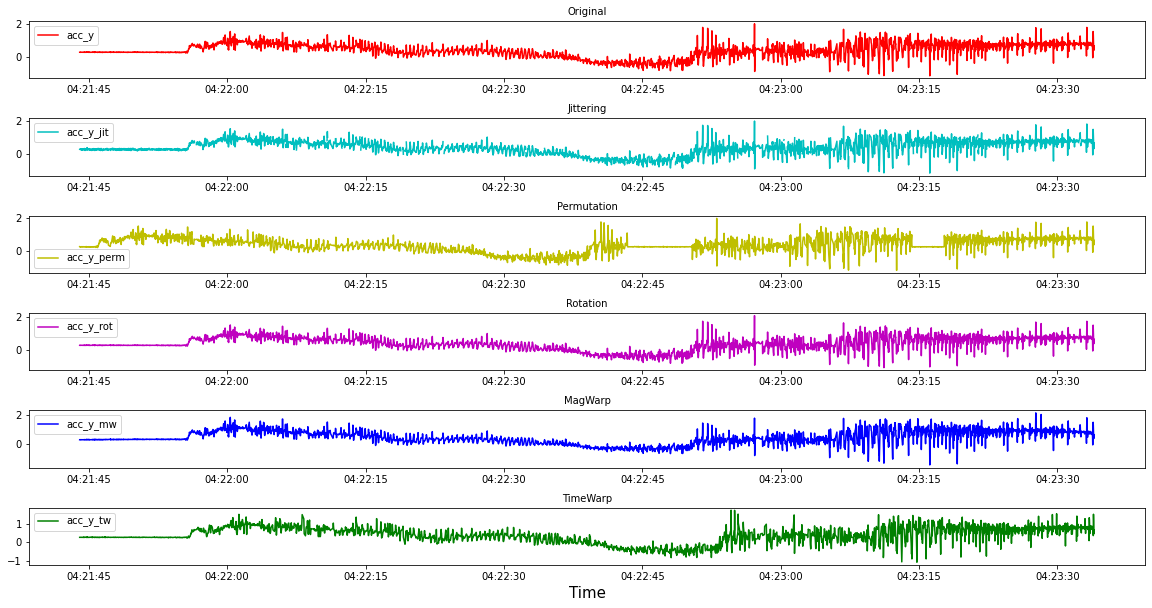

In [70]:
f, (x, y,z,d,e,g) = plt.subplots(6, 1)
f.set_figheight(10)
f.set_figwidth(20)
f.subplots_adjust(hspace=0.7)

x.plot(timeseries.index,timeseries.values[:,1],'r', label='acc_y')
# x.set_ylabel('acc_y')
x.set_title("Original",fontsize=10)
x.legend()

y.plot(jit.index,jit.values[:,1],'c',label='acc_y_jit')
# y.set_xlabel("Time",fontsize=15)
# y.set_ylabel('acc_y_tw')
y.set_title("Jittering",fontsize=10)
y.legend()

z.plot(permi.index,permi.values[:,1],'y',label='acc_y_perm')
# z.set_xlabel("Time",fontsize=15)
# z.set_ylabel('acc_y_perm_tw')
z.set_title("Permutation",fontsize=10)
z.legend()

d.plot(rote.index,rote.values[:,1],'m',label='acc_y_rot')
# d.set_ylabel('acc_y_rot_perm_tw')
d.set_title("Rotation",fontsize=10)
d.legend()

e.plot(magw.index,magw.values[:,1],'blue',label='acc_y_mw')
# e.set_ylabel('acc_y_rot_perm_tw')
e.set_title("MagWarp",fontsize=10)
e.legend()

g.plot(timi.index,timi.values[:,1],'green',label='acc_y_tw')
g.set_xlabel('Time',fontsize=15)
g.set_title("TimeWarp",fontsize=10)
g.legend()



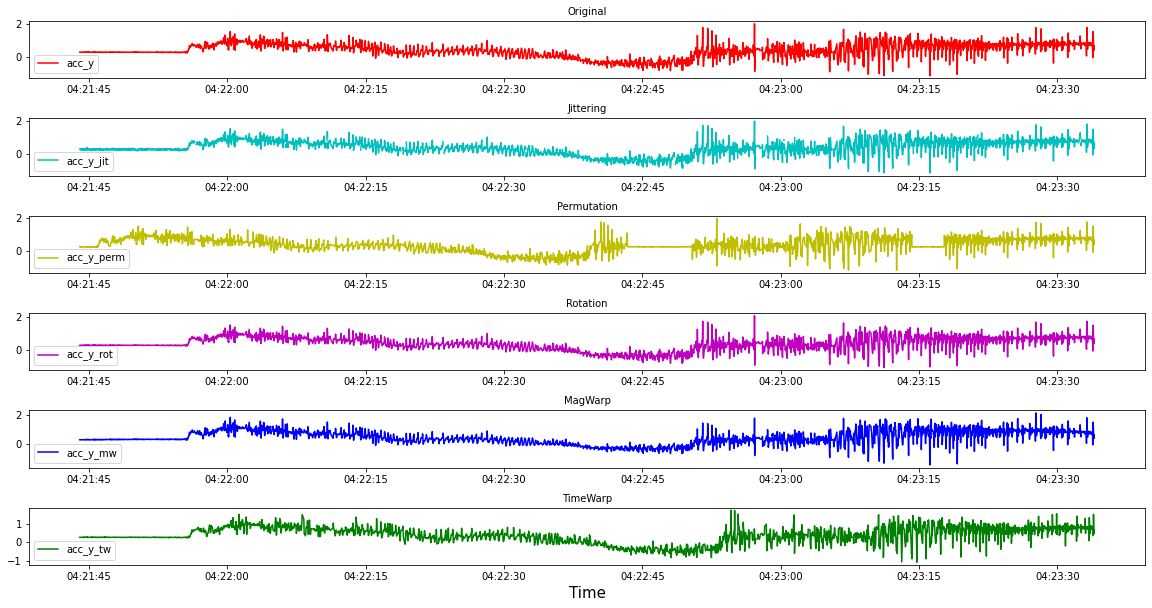

In [71]:
f, (x, y, z, d, e, g) = plt.subplots(6, 1)
f.set_figheight(10)
f.set_figwidth(20)
f.subplots_adjust(hspace=0.7)

x.plot(timeseries.index, timeseries.values[:, 1], 'r', label='acc_y')
x.set_title("Original", fontsize=10)
x.legend(loc='lower left')

y.plot(jit.index, jit.values[:, 1], 'c', label='acc_y_jit')
y.set_title("Jittering", fontsize=10)
y.legend(loc='lower left')

z.plot(permi.index, permi.values[:, 1], 'y', label='acc_y_perm')
z.set_title("Permutation", fontsize=10)
z.legend(loc='lower left')

d.plot(rote.index, rote.values[:, 1], 'm', label='acc_y_rot')
d.set_title("Rotation", fontsize=10)
d.legend(loc='lower left')

e.plot(magw.index, magw.values[:, 1], 'blue', label='acc_y_mw')
e.set_title("MagWarp", fontsize=10)
e.legend(loc='lower left')

g.plot(timi.index, timi.values[:, 1], 'green', label='acc_y_tw')
g.set_xlabel('Time', fontsize=15)
g.set_title("TimeWarp", fontsize=10)
g.legend(loc='lower left')


In [72]:
f.savefig('stan_tech_all.png', dpi=330)


## Combination of techniques in a single plot

In [73]:

rot_per = rot(permu(timeseries))
per_tw = permu(DA_TimeWarp(timeseries,0.2)[0])
rot_tw = rot(DA_TimeWarp(timeseries,0.2)[0])
rot_perm_tw = rot(permu(DA_TimeWarp(timeseries,0.2)[0]))


[   0   94 3777 4245 4496 4761]
[   0  727 1098 3222 3970 4761]
[   0  563 1075 1560 3303 4761]


#### Plotting  combination of different techniques of acc_y 

Text(0.5, 0, 'Time')

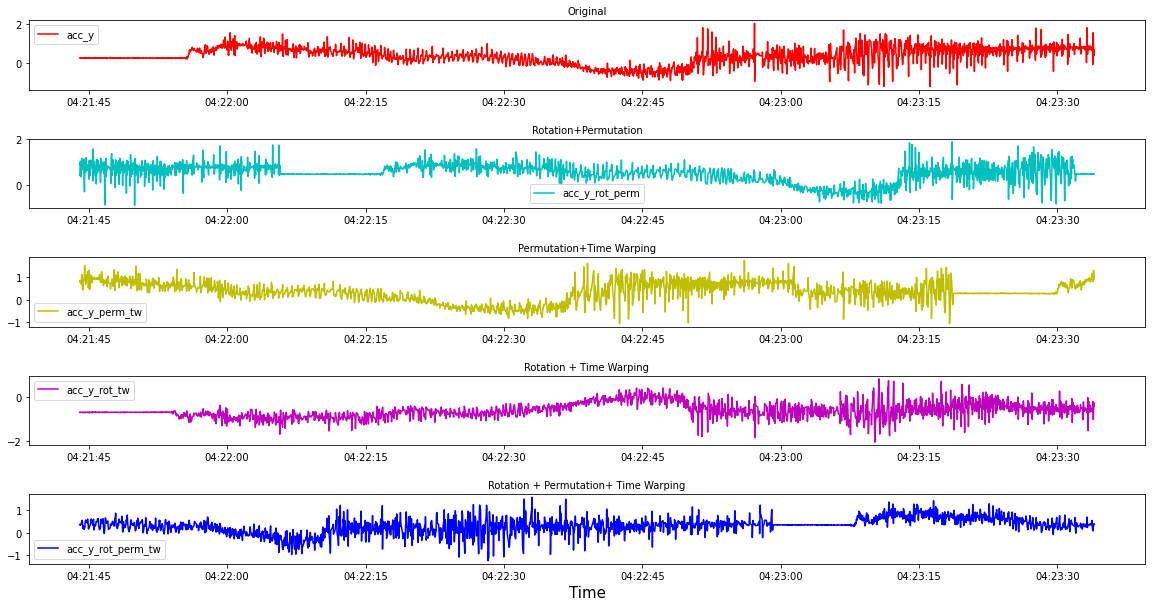

In [74]:
f, (x, y,z,d,e) = plt.subplots(5, 1)
f.set_figheight(10)
f.set_figwidth(20)
f.subplots_adjust(hspace=0.7)

x.plot(timeseries.index,timeseries.values[:,1],'r', label='acc_y')
# x.set_ylabel('acc_y')
x.set_title("Original",fontsize=10)
x.legend()

y.plot(rot_per.index,rot_per.values[:,1],'c',label='acc_y_rot_perm')
# y.set_xlabel("Time",fontsize=15)
# y.set_ylabel('acc_y_tw')
y.set_title("Rotation+Permutation",fontsize=10)
y.legend()

z.plot(per_tw.index,per_tw.values[:,1],'y',label='acc_y_perm_tw')
# z.set_xlabel("Time",fontsize=15)
# z.set_ylabel('acc_y_perm_tw')
z.set_title("Permutation+Time Warping",fontsize=10)
z.legend()

d.plot(rot_tw.index,rot_tw.values[:,1],'m',label='acc_y_rot_tw')
# d.set_ylabel('acc_y_rot_perm_tw')
d.set_title("Rotation + Time Warping",fontsize=10)
d.legend()

e.plot(rot_perm_tw.index,rot_perm_tw.values[:,1],'blue',label='acc_y_rot_perm_tw')
# e.set_ylabel('acc_y_rot_perm_tw')
e.set_title("Rotation + Permutation+ Time Warping",fontsize=10)
e.legend()

e.set_xlabel('Time',fontsize=15)

Text(0.5, 0, 'Time')

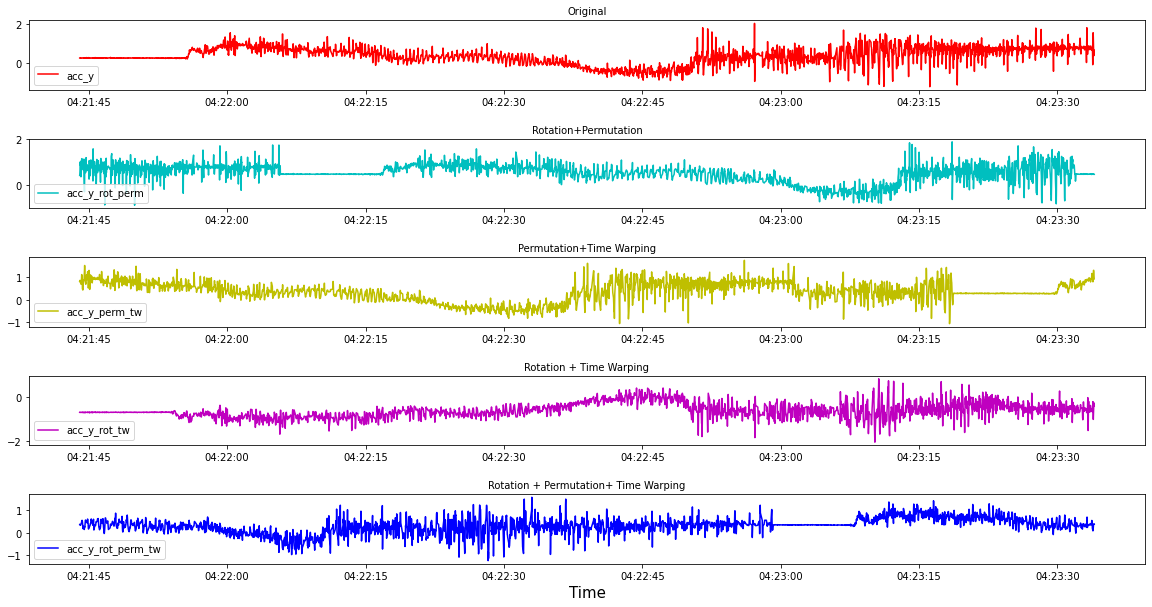

In [75]:
f, (x, y, z, d, e) = plt.subplots(5, 1)
f.set_figheight(10)
f.set_figwidth(20)
f.subplots_adjust(hspace=0.7)

x.plot(timeseries.index, timeseries.values[:, 1], 'r', label='acc_y')
x.set_title("Original", fontsize=10)
x.legend(loc='lower left')

y.plot(rot_per.index, rot_per.values[:, 1], 'c', label='acc_y_rot_perm')
y.set_title("Rotation+Permutation", fontsize=10)
y.legend(loc='lower left')

z.plot(per_tw.index, per_tw.values[:, 1], 'y', label='acc_y_perm_tw')
z.set_title("Permutation+Time Warping", fontsize=10)
z.legend(loc='lower left')

d.plot(rot_tw.index, rot_tw.values[:, 1], 'm', label='acc_y_rot_tw')
d.set_title("Rotation + Time Warping", fontsize=10)
d.legend(loc='lower left')

e.plot(rot_perm_tw.index, rot_perm_tw.values[:, 1], 'blue', label='acc_y_rot_perm_tw')
e.set_title("Rotation + Permutation+ Time Warping", fontsize=10)
e.legend(loc='lower left')

e.set_xlabel('Time', fontsize=15)


In [76]:
f.savefig('comb_tech_all.png', dpi=330)

### Window Slicing
- this is the only technique applied on windowed version of data. We use windowed numpy arrays and convert to df for plotting
- window slicing of acc_y 

In [77]:
def window_slice(x, reduce_ratio=0.9):
    # https://halshs.archives-ouvertes.fr/halshs-01357973/document
    target_len = np.ceil(reduce_ratio * x.shape[1]).astype(int)
    if target_len >= x.shape[1]:
        return x
    starts = np.random.randint(low=0, high=x.shape[1] - target_len, size=(x.shape[0])).astype(int)
    ends = (target_len + starts).astype(int)

    ret = np.zeros_like(x)
    for i, pat in enumerate(x):
        for dim in range(x.shape[2]):
            ret[i, :, dim] = np.interp(np.linspace(0, target_len, num=x.shape[1]), np.arange(target_len),
                                       pat[starts[i]:ends[i], dim]).T
    return ret

In [78]:

def convert_window_to_dataframe(acc, times, hrtemp=[]):
    df_list = []
    df_list2 = []

    for s_idx in range(len(times)):
        start = times[s_idx, 0]
        end = times[s_idx, 1]
        df_time = pd.date_range(start=start, end=end, periods=500)
        data = acc[s_idx, :, :]
        df = pd.DataFrame(data=data, index=df_time, columns=['acc_x', 'acc_y', 'acc_z'])
        df_list.append(df)
    accxyz_df = pd.concat(df_list, axis=0)
    accxyz_df = accxyz_df.sort_index()
    # print(hrtemp)

    if len(hrtemp)!=0:
        # print('here')
        for s_idx in range(len(times)):
            start = times[s_idx, 0]
            end = times[s_idx, 1]
            df_time2 = pd.date_range(start=start, end=end, periods=10)
            data2 = hrtemp[s_idx, :, :]
            df2 = pd.DataFrame(data=data2, index=df_time2, columns=['hr', 'Temperature'])
            df_list2.append(df2)

        hrtemp_df = pd.concat(df_list2, axis=0)
        hrtemp_df = hrtemp_df.sort_index()

        return accxyz_df, hrtemp_df
    else:
        return accxyz_df

In [79]:
acc_y = np.load(r'C:\Users\seyidova\Desktop\thesis_imgs\BN_011_acc_y_feats.npy')
acc_x = np.load(r'C:\Users\seyidova\Desktop\thesis_imgs\BN_011_acc_x_feats.npy')
acc_z = np.load(r'C:\Users\seyidova\Desktop\thesis_imgs\BN_011_acc_z_feats.npy')
acc = np.concatenate([acc_x,acc_y,acc_z],axis=2)
time_np=pd.read_pickle(r'C:\Users\seyidova\Desktop\thesis_imgs\BN_011_times').values
print(time_np.shape)
print(acc.shape)

(12196, 3)
(12196, 500, 3)


In [80]:
ws = window_slice(acc)

In [81]:
orig_sample = convert_window_to_dataframe(acc,time_np) #df
ws_sample = convert_window_to_dataframe(ws,time_np) #df



In [82]:
# extract seizure interval from orig and ws sample
start = '2017-03-11 04:23:00'
end =  '2017-03-11 04:23:33'
orig_sample=orig_sample[start:end]
ws_sample= ws_sample[start:end]
orig_sample.shape , ws_sample.shape 

((1378, 3), (1378, 3))

#### Plotting window sliced acc_y

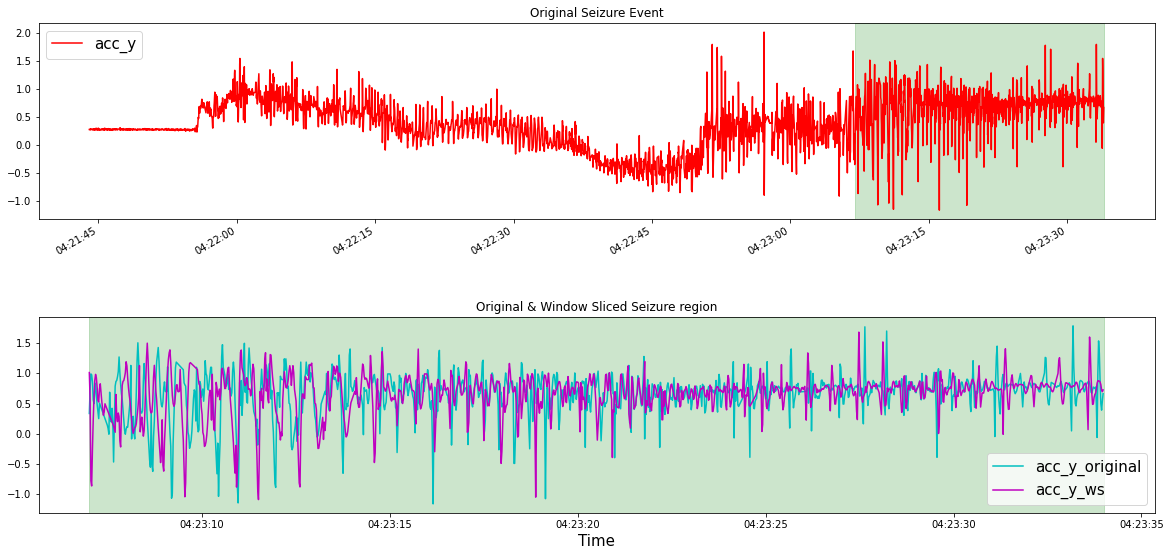

In [83]:
import matplotlib.pyplot as plt

start = '2017-03-11 04:23:07'
end = '2017-03-11 04:23:34'
orig_sample = orig_sample[start:end]
ws_sample = ws_sample[start:end]

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))
f.subplots_adjust(hspace=0.5)

timeseries.plot(y='acc_y', ax=ax1, label='acc_y', color='r')
ax1.axvspan(start, end, alpha=0.2, color='green')
ax1.set_title('Original Seizure Event')
ax1.legend(['acc_y'], fontsize=15)

ax2.plot(orig_sample['acc_y'].index[:], orig_sample['acc_y'].values[:], 'c', label='acc_y_original')
ax2.plot(ws_sample['acc_y'].index[:], ws_sample['acc_y'].values[:], 'm', label='acc_y_ws')
ax2.set_title('Original & Window Sliced Seizure region')
ax2.axvspan(start, end, alpha=0.2, color='green')

ax2.legend(fontsize=15)


# set x-axis label for third subplot
ax2.set_xlabel('Time', fontsize=15)

plt.show()
